In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview

In [2]:
MouseDrug=pd.read_csv(mouse_drug_data_to_load)
mddf= pd.DataFrame(MouseDrug)
mddf.head(2)
mddf[mddf['Mouse ID']=='b128']

,Mouse ID,Drug
75,b128,Capomulin


In [3]:
ClinicalTrial= pd.read_csv(clinical_trial_data_to_load)
ctdf=pd.DataFrame(ClinicalTrial)
ctdf.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [4]:
??pd.merge

In [5]:
dfm= pd.merge(ctdf,mddf,how='left',on='Mouse ID')
dfm.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [7]:
trt= dfm.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
trt= pd.DataFrame(trt)
trt=trt.reset_index()
trt.head(12)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [9]:
from scipy.stats import sem

In [10]:
trterror= dfm.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
trterror=pd.DataFrame(trterror).reset_index()
trterror.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
trterrorgrp=trterror.reset_index().groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].aggregate('first').unstack()
trterrorgrp

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [13]:
trtgroups=trt.reset_index().groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].aggregate('first').unstack()
trtgroups.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [14]:
trtpivot=trt.pivot_table(index='Timepoint',columns='Drug').head()
trtpivot

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [15]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [16]:
??plt.legend()

Object `plt.legend()` not found.


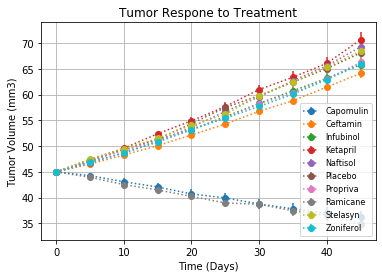

In [81]:
#[plt.scatter(trtgroups.index,trtgroups[str(i)]) for i in trtgroups.columns]
[plt.errorbar(trterrorgrp.index,trtgroups[str(i)],trterrorgrp[str(i)],marker='o',linestyle=':',label=i) for i in trterrorgrp.columns]
plt.xlabel ('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Respone to Treatment')
plt.legend(loc=0, fontsize=8)
plt.grid()
plt.show()

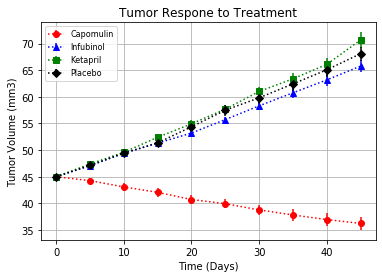

In [80]:
plt.errorbar(trterrorgrp.index,trtgroups['Capomulin'],trterrorgrp['Capomulin'],marker='o',color='red',linestyle=':',label='Capomulin') 
plt.errorbar(trterrorgrp.index,trtgroups['Infubinol'],trterrorgrp['Infubinol'],marker='^',color='blue',linestyle=':',label='Infubinol')
plt.errorbar(trterrorgrp.index,trtgroups['Ketapril'],trterrorgrp['Ketapril'],marker='s',color='green',linestyle=':',label='Ketapril')
plt.errorbar(trterrorgrp.index,trtgroups['Placebo'],trterrorgrp['Placebo'],marker='D',color='black',linestyle=':',label='Placebo')
plt.xlabel ('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Respone to Treatment')
plt.legend(loc=0, fontsize=8)
plt.grid()
plt.show()

In [19]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [21]:
mrtt= dfm.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
mrtt= pd.DataFrame(mrtt)
mrtt.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [23]:
mrtterror=dfm.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
mrtterror= pd.DataFrame(mrtterror)
mrtterror.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [24]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [25]:
trtgroups.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [26]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


In [27]:
mrttgroup= mrtt.reset_index().groupby(['Timepoint','Drug'])['Metastatic Sites'].aggregate('first').unstack()
mrttgroup.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


In [28]:
mrtterrorgrp= mrtterror.reset_index().groupby(['Timepoint','Drug'])['Metastatic Sites'].aggregate('first').unstack()
mrtterrorgrp.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


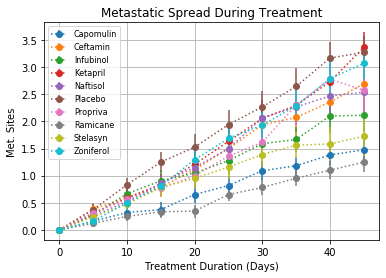

In [54]:
#[plt.scatter(trtgroups.index,trtgroups[str(i)]) for i in trtgroups.columns]
[plt.errorbar(mrtterrorgrp.index,mrttgroup[i],mrtterrorgrp[i],marker='o',label=i,linestyle=':') for i in mrtterrorgrp.columns]
plt.xlabel ('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc=0, fontsize=8)
plt.grid()
plt.show()

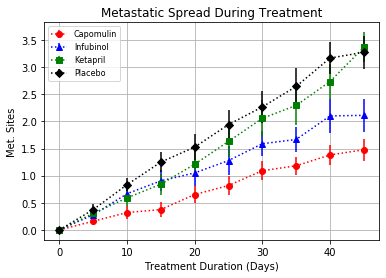

In [56]:
plt.errorbar(mrtterrorgrp.index,mrttgroup['Capomulin'],mrtterrorgrp['Capomulin'],marker='o',color='red',linestyle=':',label='Capomulin') 
plt.errorbar(mrtterrorgrp.index,mrttgroup['Infubinol'],mrtterrorgrp['Infubinol'],marker='^',color='blue',linestyle=':',label='Infubinol')
plt.errorbar(mrtterrorgrp.index,mrttgroup['Ketapril'],mrtterrorgrp['Ketapril'],marker='s',color='green',linestyle=':',label='Ketapril')
plt.errorbar(mrtterrorgrp.index,mrttgroup['Placebo'],mrtterrorgrp['Placebo'],marker='D',color='black',linestyle=':',label='Placebo')
plt.xlabel ('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc=0, fontsize=8)
plt.grid()
plt.show()

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [32]:
sr= dfm.groupby(['Drug','Timepoint'])['Mouse ID'].agg({'Mouse Count':'count'})
sr= pd.DataFrame(sr).reset_index()
sr.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [34]:
srgroup= sr.reset_index().groupby(['Timepoint','Drug'])['Mouse Count'].aggregate('first').unstack()
srgroup.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [35]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [36]:
import matplotlib.ticker as mtick
import matplotlib.axes as ax

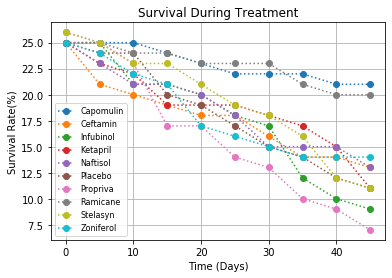

In [52]:
[plt.errorbar(srgroup.index,srgroup[i],marker='o',label=i,linestyle=':') for i in srgroup.columns]
plt.xlabel ('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survival During Treatment')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc=0, fontsize=8)
plt.grid()
plt.show()

In [74]:
# mi, ma= srgroup['Capomulin'].min(), srgroup['Capomulin'].min()
# r= ma-mi
# srgroup_percent= [(v-mi) * 100 / r for v in srgroup['Capomulin']]
# srgroup_percent

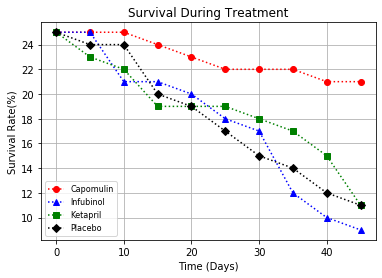

In [75]:
plt.errorbar(srgroup.index,srgroup['Capomulin'],marker='o',color='red',linestyle=':',label='Capomulin') 
plt.errorbar(srgroup.index,srgroup['Infubinol'],marker='^',color='blue',linestyle=':',label='Infubinol')
plt.errorbar(srgroup.index,srgroup['Ketapril'],marker='s',color='green',linestyle=':',label='Ketapril')
plt.errorbar(srgroup.index,srgroup['Placebo'],marker='D',color='black',linestyle=':',label='Placebo')
plt.xlabel ('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survival During Treatment')
plt.legend(loc=0, fontsize=8)
plt.grid()
plt.show()

## Summary Bar Graph

In [39]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [82]:
summary=trtgroups.pct_change(periods=9).stack() *100
summary.reset_index().drop('Timepoint',axis=1).set_index('Drug')


,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [42]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


<BarContainer object of 10 artists>

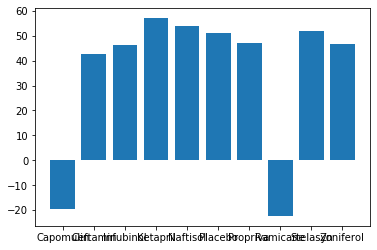

In [43]:
plt.bar(trtgroups.columns,summary)

Text(0.5, 1.0, 'Tumor Change Over 45 Day Treatment')

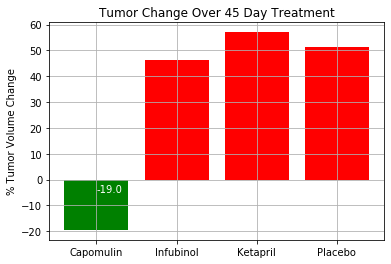

In [85]:
plt.bar(x='Capomulin',height=summary[0],color='g')
plt.text(x=0,y=-5,s=round(summary[0]),color='white')
plt.bar(x=['Infubinol','Ketapril','Placebo'],height=summary[[2,3,5]],color='r')
plt.grid()
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

1-The Capumlin and Ramicane treatments were the most successful kinds it had the highest Survival During treatment, 
lowest increase Metastatic Spread and actual decrease in Tumor Volume.
2-The percent decrease in Tumor Volume with Capumlin 19% and Ramicane 22%
3- The worst Treatment was Ketapril and Placebo as the Tumors increased during the treatment.
